In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [125]:
def load_housing_data(housing_path):
    return pd.read_csv(housing_path)

In [126]:
housing = load_housing_data(housing_path='../datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [127]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notice that the total_bed
rooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing
this feature. We will need to take care of this later.


When you looked at the top five rows, you
probably noticed that the values in the ocean_proximity column were repetitive,
which means that it is probably a categorical attribute. You can find out what cate‐
gories exist and how many districts belong to each category by using the
value_counts() method

In [128]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [129]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


A histogram shows the number of instances
(on the vertical axis) that have a given value range (on the horizontal axis). You can
either plot this one attribute at a time, or you can call the hist() method on the
whole dataset 

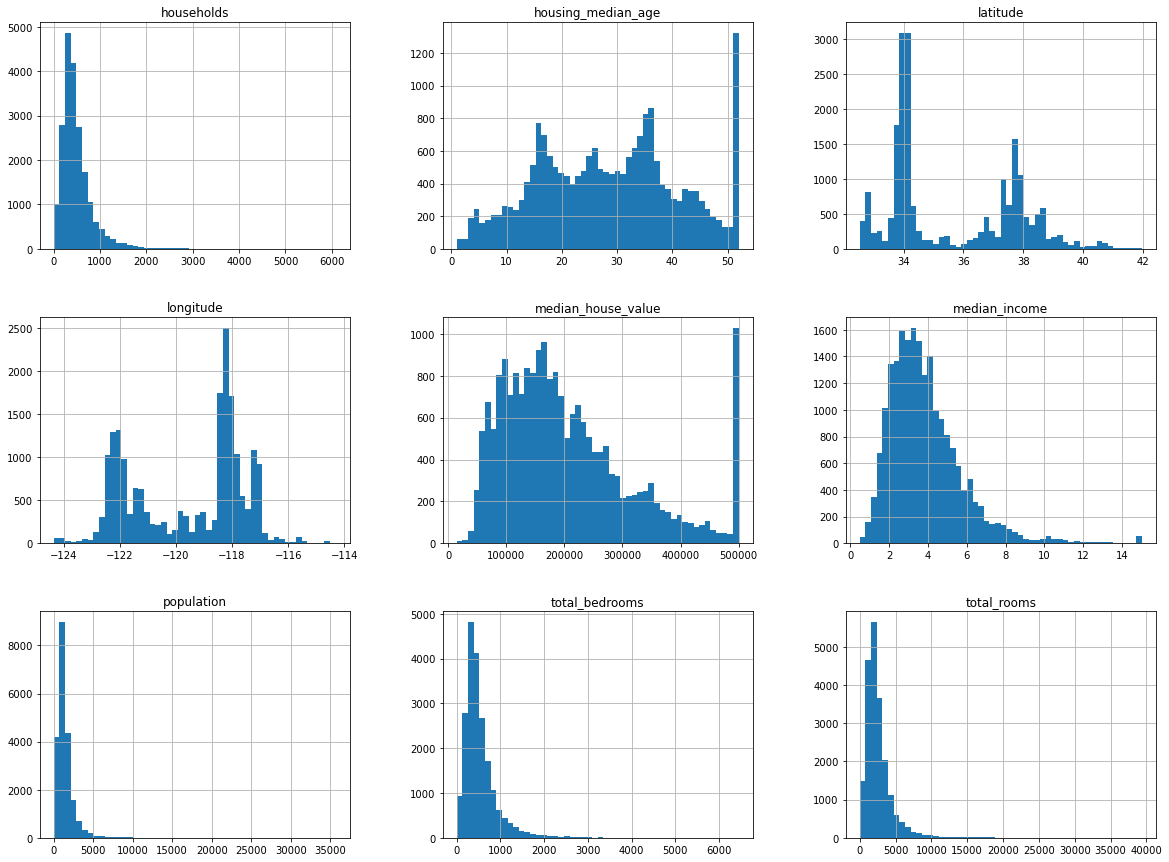

In [130]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Create a test set
Creating a test set is theoretically simple: pick some instances randomly, typically
20% of the dataset

In [131]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    print(shuffled_indices)
    test_set_size = int(len(data) * test_ratio)
    print(test_set_size)
    test_indices = shuffled_indices[:test_set_size]
    print(test_indices)
    print(len(test_indices))
    train_indices = shuffled_indices[test_set_size:]
    print(train_indices)
    print(len(train_indices))
    return data.iloc[train_indices], data.iloc[test_indices]

In [132]:
len(housing)

20640

In [133]:
train_set, test_set = split_train_test(housing,0.2)


[11257  3450  4208 ...  8469 11818  8346]
4128
[11257  3450  4208 ...  4098  9089   220]
4128
[ 7356  6310  6892 ...  8469 11818  8346]
16512


In [134]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7356,-118.16,33.96,24.0,1635.0,507.0,2480.0,481.0,2.4432,187500.0,<1H OCEAN
6310,-118.02,34.04,27.0,5640.0,1001.0,3538.0,978.0,5.0650,215400.0,<1H OCEAN
6892,-118.09,34.04,18.0,5580.0,1369.0,3842.0,1276.0,3.6512,168500.0,<1H OCEAN
2749,-115.56,32.76,15.0,1278.0,217.0,653.0,185.0,4.4821,140300.0,INLAND
6891,-118.10,34.05,26.0,1495.0,328.0,1296.0,304.0,2.9130,152300.0,<1H OCEAN


In [135]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11257,-117.98,33.81,35.0,897.0,156.0,479.0,161.0,5.1520,215600.0,<1H OCEAN
3450,-118.43,34.33,18.0,5891.0,920.0,2882.0,911.0,5.9010,235600.0,<1H OCEAN
4208,-118.24,34.10,42.0,1525.0,456.0,1688.0,432.0,3.1691,141300.0,<1H OCEAN
13202,-117.71,34.06,27.0,2127.0,628.0,1970.0,534.0,1.4722,91300.0,INLAND
11576,-118.00,33.76,14.0,1120.0,319.0,982.0,307.0,2.9083,179200.0,<1H OCEAN


Well, this works, but it is not perfect: if you run the program again, it will generate a
different test set! Over time, you (or your Machine Learning algorithms) will get to
see the whole dataset, which is what you want to avoid.


Scikit-Learn provides a few functions to split datasets into multiple subsets in various
ways. The simplest function is train_test_split(), which does pretty much the
same thing as the function split_train_test(), with a couple of additional features.
First, there is a random_state parameter that allows you to set the random generator
seed. Second, you can pass it multiple datasets with an identical number of rows, and
it will split them on the same indices


In [136]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.
Since the median income is a continuous numerical attribute, you first need to create
an income category attribute. Let’s look at the median income histogram more closely
(back in Figure 2-8): most median income values are clustered around 1.5 to 6 (i.e.,
$15,000–$60,000), but some median incomes go far beyond 6. It is important to have
a sufficient number of instances in your dataset for each stratum, or else the estimate
of a stratum’s importance may be biased. This means that you should not have too
many strata, and each stratum should be large enough. The following code uses the
pd.cut() function to create an income category attribute with five categories (labeled
from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
1.5 to 3, and so on:


In [137]:
housing["income_cat"] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1,2,3,4,5])

In [138]:
housing['income_cat'].head()

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [139]:
housing.loc[0]

longitude              -122.23
latitude                 37.88
housing_median_age          41
total_rooms                880
total_bedrooms             129
population                 322
households                 126
median_income           8.3252
median_house_value      452600
ocean_proximity       NEAR BAY
income_cat                   5
Name: 0, dtype: object

Now you are ready to do stratified sampling based on the income category. For this
you can use Scikit-Learn’s StratifiedShuffleSplit class:


In [140]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
i = 0
for train_index, test_index in split.split(housing, housing['income_cat']) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [141]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

Now you should remove the income_cat attribute so the data is back to its original
state:


In [142]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

We spent quite a bit of time on test set generation for a good reason: this is an often
neglected but critical part of a Machine Learning project. Moreover, many of these
ideas will be useful later when we discuss cross-validation. Now it’s time to move on
to the next stage: exploring the data.


### Discover and Visualize the Data to Gain Insights


In [143]:
housing = strat_test_set.copy()

#### Visualizing Geographical data


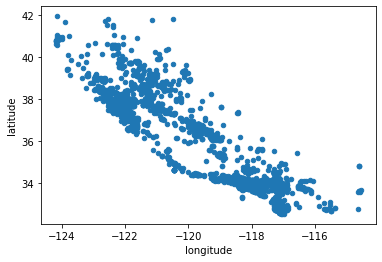

In [144]:
housing.plot(kind="scatter", x="longitude", y="latitude")

This looks like California all right, but other than that it is hard to see any particular
pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points

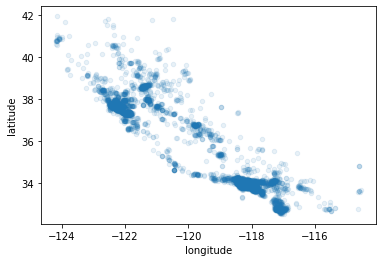

In [145]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

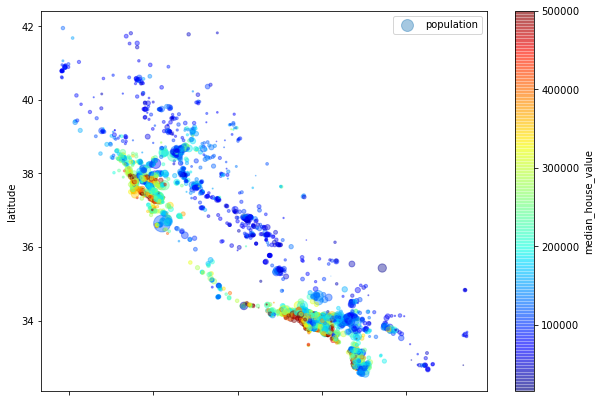

In [146]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

Picture Above :  The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices).This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as you probably knew already.


## Looking for Correlations
Since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method:


In [147]:
corr_matrix = housing.corr()

In [148]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). 

Another way to check for correlation between attributes is to use the pandas
scatter_matrix() function, which plots every numerical attribute against every oter <b>numerical</b> attribute. Since there are now 11 numerical attributes, you would get
11<sup>2</sup> = 121 plots, which would not fit on a page—so let’s just focus on a few promising
attributes that seem most correlated with the median housing value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b9a7cae50>,
      dtype=object)

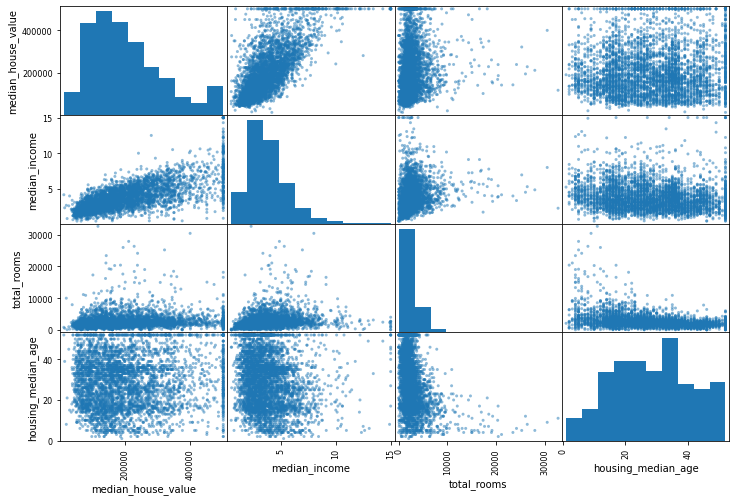

In [149]:
attributes = ['median_house_value','median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

The main diagonal (top left to bottom right) would be full of straight lines if pandas
plotted each variable against itself, which would not be very useful. So instead pandas
displays a histogram of each attribute (other options are available; see the pandas
documentation for more details).


The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot

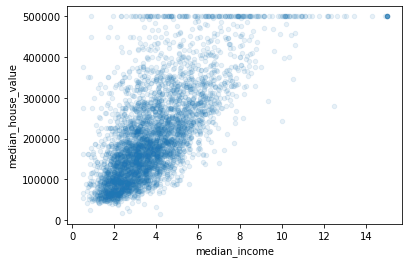

In [150]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend

### Experimenting with Attribute Combinations


One last thing you may want to do before preparing the data for Machine Learning
algorithms is to try out various attribute combinations. For example, the total num‐
ber of rooms in a district is not very useful if you don’t know how many households
there are. What you really want is the number of rooms per household. Similarly, the
total number of bedrooms by itself is not very useful: you probably want to compare
it to the number of rooms. And the population per household also seems like an
interesting attribute combination to look at. Let’s create these new attributes

In [151]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [152]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691831
rooms_per_household         0.192575
total_rooms                 0.131435
housing_median_age          0.071357
households                  0.071242
total_bedrooms              0.057568
population                 -0.016033
longitude                  -0.039987
population_per_household   -0.135142
latitude                   -0.150124
bedrooms_per_room          -0.240362
Name: median_house_value, dtype: float64

Hey, not bad! The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.


In [153]:
housing = strat_test_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them. We saw earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. You have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
methods:


In [154]:
# housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option2
# median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

If you choose option 3, you should compute the median value on the training set and
use it to fill the missing values in the training set. Don’t forget to save the median
value that you have computed. You will need it later to replace missing values in the
test set when you want to evaluate your system, and also once the system goes live to
replace missing values in new data.
Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
Here is how to use it. First, you need to create a SimpleImputer instance, specifying
that you want to replace each attribute’s missing values with the median of that
attribute:



In [155]:
imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, you need to create a
copy of the data without the text attribute ocean_proximity:


In [156]:
housing_num = housing.drop("ocean_proximity", axis=1)

Now you can fit the imputer instance to the training data using the fit() method:


In [157]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes:


In [158]:
imputer.statistics_

array([-118.455  ,   34.22   ,   28.     , 2158.5    ,  441.     ,
       1172.     ,  416.     ,    3.51475])

In [159]:
housing_num.median().values

array([-118.455  ,   34.22   ,   28.     , 2158.5    ,  441.     ,
       1172.     ,  416.     ,    3.51475])

Now you can use this “trained” imputer to transform the training set by replacing
missing values with the learned medians:


In [160]:
X = imputer.transform(housing_num)

In [123]:
X

array([[-118.39  ,   34.12  ,   29.    , ..., 2184.    ,  960.    ,
           8.2816],
       [-117.86  ,   33.77  ,   39.    , ..., 1669.    ,  651.    ,
           4.6111],
       [-119.05  ,   34.21  ,   27.    , ..., 2110.    ,  876.    ,
           3.0119],
       ...,
       [-118.49  ,   34.18  ,   31.    , ..., 1486.    ,  684.    ,
           4.8984],
       [-117.32  ,   33.99  ,   27.    , ..., 2400.    ,  836.    ,
           4.711 ],
       [-118.91  ,   36.79  ,   19.    , ...,  187.    ,   80.    ,
           3.7857]])

The result is a plain NumPy array containing the transformed features. If you want to
put it back into a pandas DataFrame, it’s simple:


In [161]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)

### Handling Text and Categorical Attributes
 In this dataset, there is just one: the ocean_proximity attribute. Let’s look
at its value for the first 10 instances:


In [182]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
5241,<1H OCEAN
10970,<1H OCEAN
20351,<1H OCEAN
6568,INLAND
13285,INLAND
20552,INLAND
19989,INLAND
17049,NEAR OCEAN
13692,INLAND
13916,INLAND


So this attribute is a categorical attribute. Most Machine Learn‐
ing algorithms prefer to work with numbers, so let’s convert these categories from
text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class

In [180]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [4.],
       [1.],
       [1.]])

You can get the list of categories using the categories_ instance variable. It is a list
containing a 1D array of categories for each categorical attribute (in this case, a list
containing a single array since there is just one categorical attribute):


In [183]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obvi‐
ously not the case for the ocean_proximity column (for example, categories 0 and 4
are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the cate‐
gory is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the cate‐
gory is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding,
because only one attribute will be equal to 1 (hot), while the others will be 0 (cold)

problem with label encoder : https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b

In [185]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very
useful when you have categorical attributes with thousands of categories. After one-
hot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s
except for a single 1 per row. Using up tons of memory mostly to store zeros would
be very wasteful, so instead a sparse matrix only stores the location of the nonzero
elements. You can use it mostly like a normal 2D array,21 but if you really want to con‐
vert it to a (dense) NumPy array, just call the toarray() method:


In [186]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Once again, you can get the list of categories using the encoder’s categories_
instance variable:


In [187]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]